# Banana Quality 

Dataset: https://www.kaggle.com/datasets/mrmars1010/banana-quality-dataset

Purpose:
- Determine the correlation between banana characteristics based on growing environment
- Which country has the best quality banana?

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'C:\Users\Mouth\Documents\Datasets\Banana Quality\banana_quality_dataset.csv')

In [36]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


## Data Cleaning

1. Remove duplicates
2. Handle missing values
3. Standardize formats
4. Validate ranges
5. Rename columns

In [37]:
df.shape

(1000, 16)

In [38]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [39]:
# Check for missing values
missing_value_count = df.isnull().sum()
missing_value_count

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [40]:
# Standardize formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [41]:
# Check text columns if formats are consistent and there are no errors
print(df['variety'].value_counts())
print()
print(df['region'].value_counts())
print()
print(df['quality_category'].value_counts())
print()
print(df['ripeness_category'].value_counts())

Plantain       146
Fehi           134
Cavendish      133
Burro          125
Manzano        119
Lady Finger    117
Red Dacca      113
Blue Java      113
Name: variety, dtype: int64

Ecuador        137
Colombia       136
India          133
Costa Rica     130
Philippines    127
Guatemala      126
Honduras       107
Brazil         104
Name: region, dtype: int64

Processing    506
Good          434
Unripe         35
Premium        25
Name: quality_category, dtype: int64

Ripe        349
Turning     310
Green       174
Overripe    167
Name: ripeness_category, dtype: int64


In [42]:
# Convert date column from object to datetime
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

In [43]:
df['harvest_date']

0     2023-10-16
1     2023-10-14
2     2023-09-08
3     2023-10-07
4     2023-10-02
         ...    
995   2023-10-04
996   2023-09-23
997   2023-10-19
998   2023-09-22
999   2023-09-29
Name: harvest_date, Length: 1000, dtype: datetime64[ns]

In [44]:
# Validate ranges of number columns
df.describe()

,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.465160,4.042170,18.516830,2.706840,19.882100,164.738930,10.879600,723.556700,1972.992800,104.391300
std,288.819436,0.540909,1.753211,2.034812,1.289252,5.736318,49.163073,5.215554,427.372855,564.467912,53.607794
min,1.000000,0.920000,1.020000,15.000000,0.500000,10.000000,81.050000,2.000000,0.400000,1000.500000,10.000000
25%,250.750000,2.090000,2.447500,16.827500,1.590000,14.902500,122.397500,6.300000,353.950000,1498.750000,60.150000
50%,500.500000,2.440000,4.110000,18.500000,2.680000,19.890000,163.365000,10.700000,726.000000,1957.400000,104.100000
75%,750.250000,2.850000,5.562500,20.312500,3.820000,24.800000,205.775000,15.600000,1071.725000,2431.800000,149.850000
max,1000.000000,3.890000,7.000000,21.980000,5.000000,29.950000,249.890000,20.000000,1498.400000,2992.000000,199.900000


In [45]:
# Add new columns
df['year'] = df['harvest_date'].dt.year

In [46]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,year
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,2023
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,2023
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,2023
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,2023
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,2023


## Analysis

In [47]:
# How many regions are there?
region_count = df['region'].value_counts()
region_count

Ecuador        137
Colombia       136
India          133
Costa Rica     130
Philippines    127
Guatemala      126
Honduras       107
Brazil         104
Name: region, dtype: int64

In [48]:
# How many varieties of bananas are there?
banana_variety = df['variety'].value_counts()
banana_variety

Plantain       146
Fehi           134
Cavendish      133
Burro          125
Manzano        119
Lady Finger    117
Red Dacca      113
Blue Java      113
Name: variety, dtype: int64

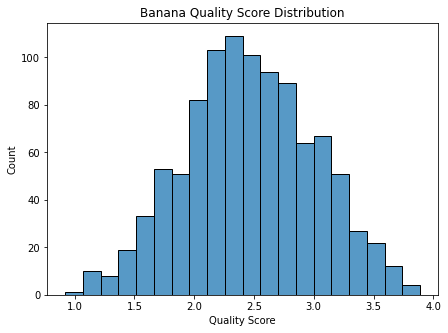

In [49]:
# Banana Quality Histogram
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='quality_score')
plt.title("Banana Quality Score Distribution")
plt.xlabel('Quality Score')
plt.show()

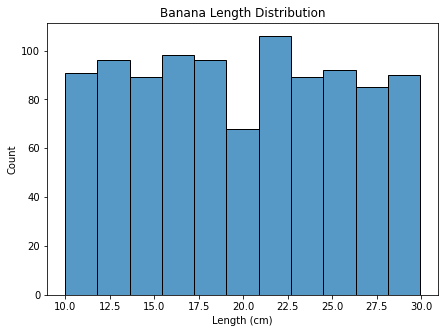

In [50]:
# Banana length Histogram
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='length_cm')
plt.title("Banana Length Distribution")
plt.xlabel('Length (cm)')
plt.show()

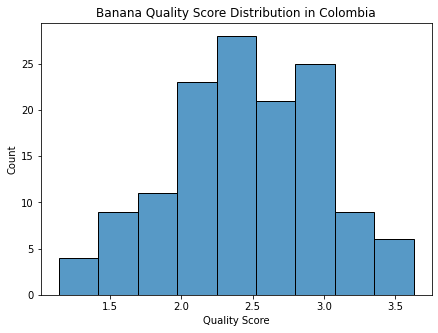

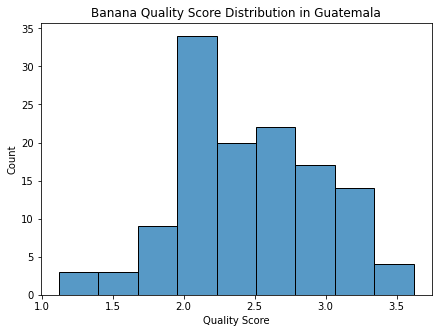

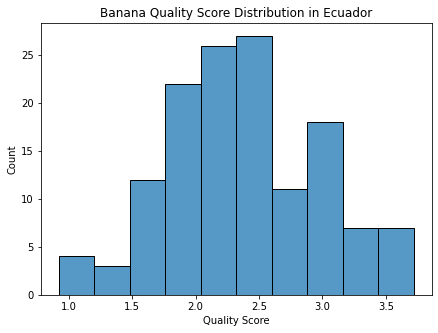

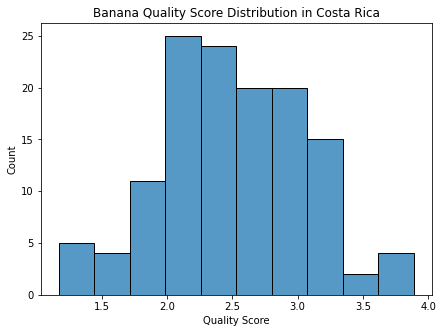

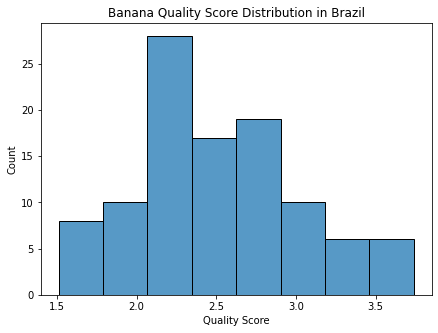

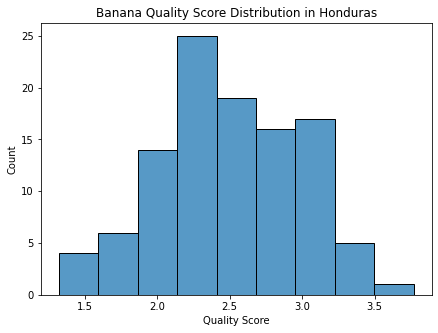

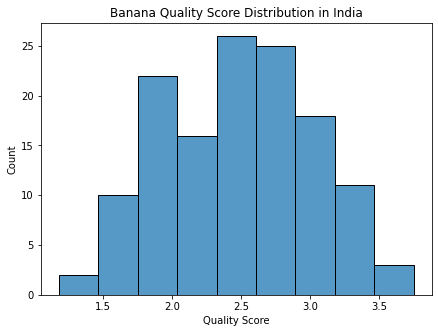

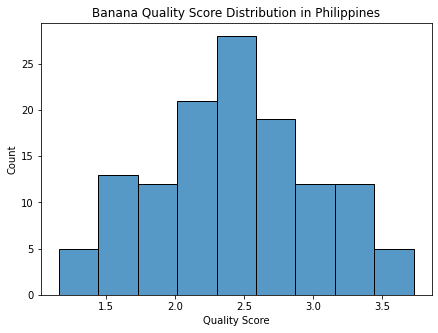

In [51]:
# Show the distribution of quality_score per region
regions = df['region'].unique().tolist()

# Iterate through each region
for region in regions:
    # Filter the region column for specific region
    region_df = df[df['region'] == region]['quality_score'].reset_index()

    # Plot on histogram
    plt.figure(figsize=(7,5))
    sns.histplot(data=region_df, x='quality_score')
    plt.title(f"Banana Quality Score Distribution in {region}")
    plt.xlabel('Quality Score')
    plt.show()

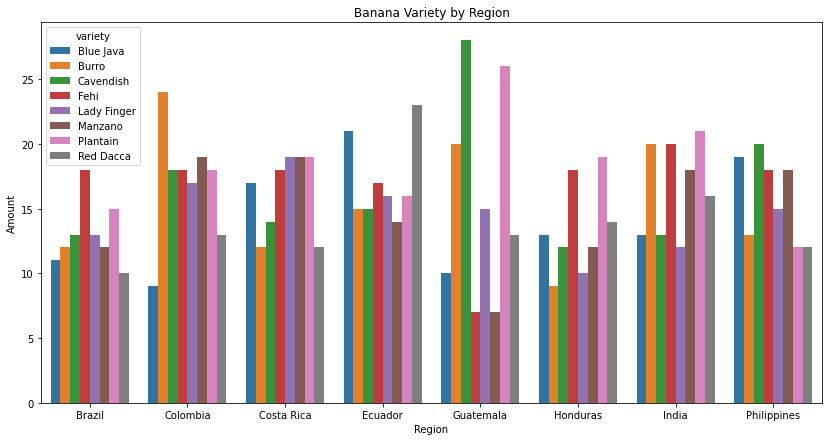

In [52]:
# How many variety of banana's are there in each region for this sample?

# Group the region and variety columns and count banana variations
region_variety = df.groupby(['region', 'variety'])['sample_id'].count().reset_index().rename(
    columns={'sample_id':'count'})

# Plot in a group bar plot
plt.figure(figsize=(14,7))
sns.barplot(data=region_variety, x='region', y='count', hue='variety')
plt.title('Banana Variety by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.show()

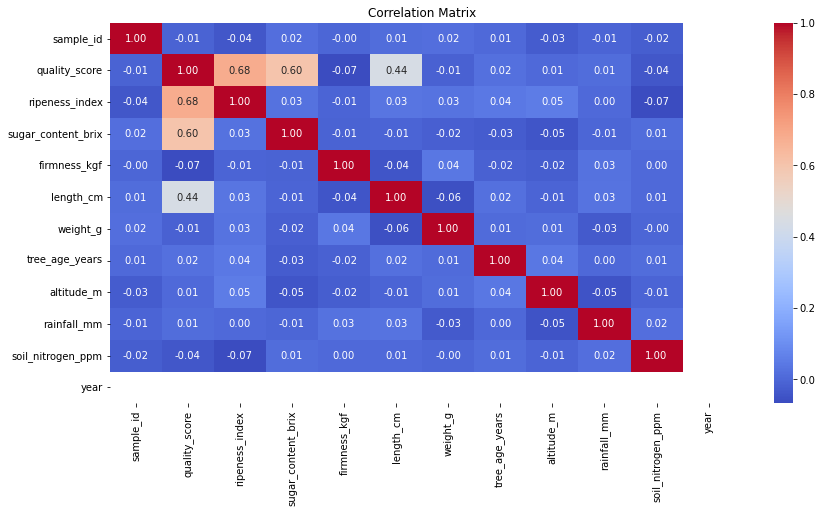

In [53]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

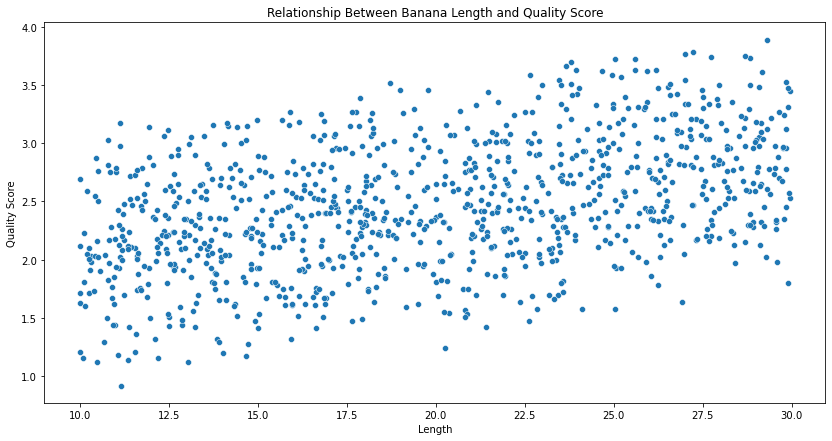

In [54]:
# Investigate the correlation between ripeness_index, sugar_content_brix, and length_cm in relation to quality_score
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='length_cm', y='quality_score')
plt.title('Relationship Between Banana Length and Quality Score')
plt.xlabel('Length')
plt.ylabel('Quality Score')
plt.show()

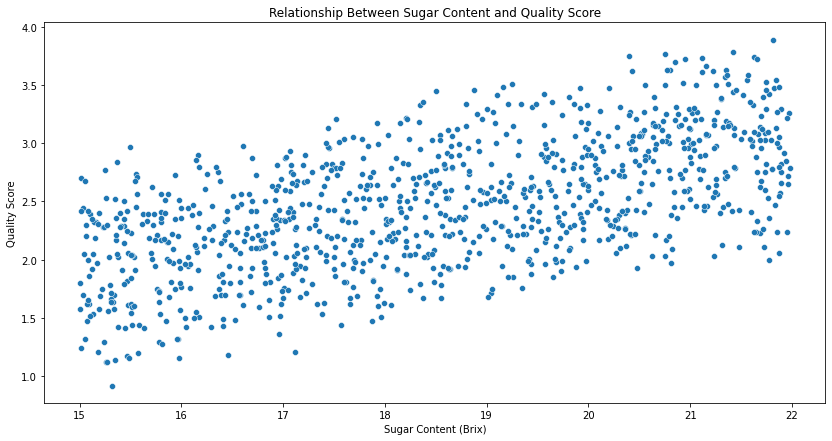

In [55]:
# Correlation between sugar_content_brix and quality score
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='sugar_content_brix', y='quality_score')
plt.title('Relationship Between Sugar Content and Quality Score')
plt.xlabel('Sugar Content (Brix)')
plt.ylabel('Quality Score')
plt.show()

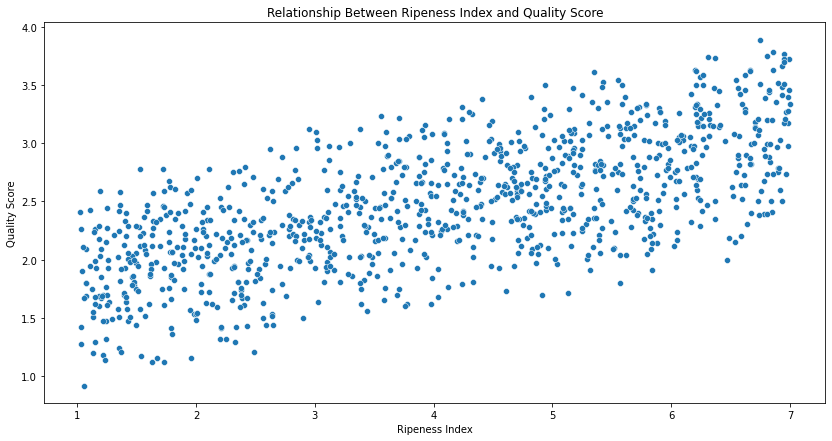

In [56]:
# Correlation between ripeness_index and quality score
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='ripeness_index', y='quality_score')
plt.title('Relationship Between Ripeness Index and Quality Score')
plt.xlabel('Ripeness Index')
plt.ylabel('Quality Score')
plt.show()

From this dataset, there is a linear correlation between quality score and features ripeness index, sugar content, and length. As the values of these features increase, the quality score of the banana is likely to increase.

In [24]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,year
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,2023
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,2023
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,2023
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,2023
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,2023


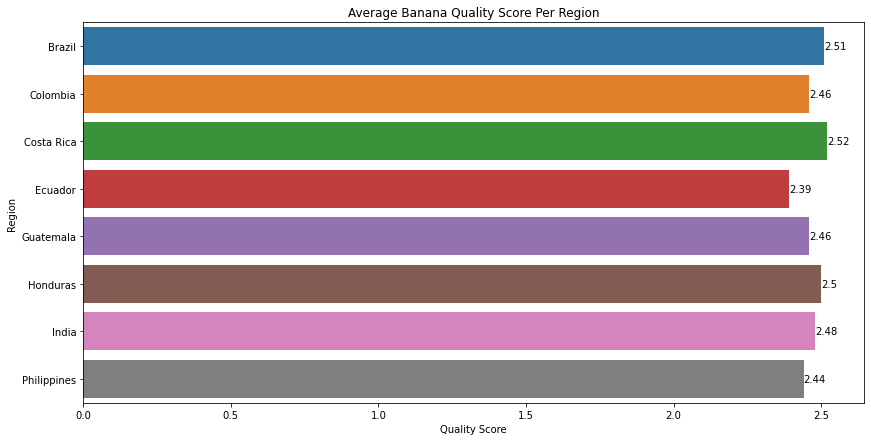

In [111]:
# What is the average quality score for each region?
region_quality_score = df.groupby(['region'])['quality_score'].mean().reset_index()

# Round quality score column to 2 decmials
region_quality_score['quality_score'] = region_quality_score['quality_score'].round(2)

# Plot bar chart
plt.figure(figsize=(14,7))
ax = sns.barplot(data=region_quality_score, x='quality_score', y='region')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Banana Quality Score Per Region')
plt.xlabel('Quality Score')
plt.ylabel('Region')
plt.show()

The quality score between regions are very similar, hovering around the 2.39 - 2.52 range. Banana quality among these regions remain competitive. 

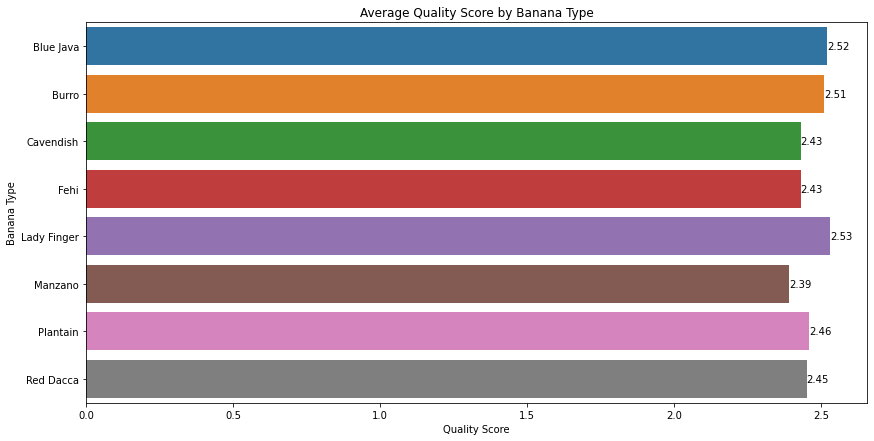

In [112]:
# What type of banana produces the highest quality score?
variety_quality_score = df.groupby(['variety'])['quality_score'].mean().reset_index()

# Round quality score column to 2 decmials
variety_quality_score['quality_score'] = variety_quality_score['quality_score'].round(2)

plt.figure(figsize=(14,7))
ax = sns.barplot(data=variety_quality_score, x='quality_score', y='variety')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Quality Score by Banana Type')
plt.xlabel('Quality Score')
plt.ylabel('Banana Type')
plt.show()

Lady finger bananas have the highest average quality score at 2.53, however the quality score of other banana types remain at close value ranging from 2.39 - 2.53.

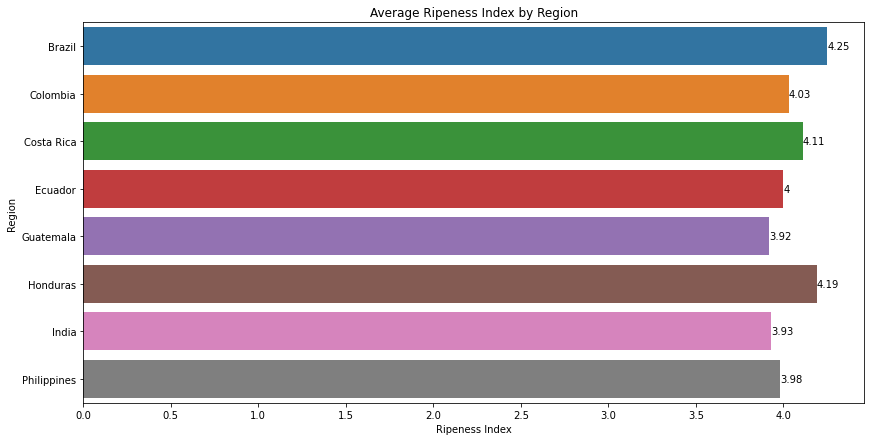

In [116]:
# What is the average ripeness index of a banana per region
region_ripeness = df.groupby(['region'])['ripeness_index'].mean().reset_index()

# Round ripeness_index column to 2 decmials
region_ripeness['ripeness_index'] = region_ripeness['ripeness_index'].round(2)

# Plot bar plot
plt.figure(figsize=(14,7))
ax = sns.barplot(data=region_ripeness, x='ripeness_index', y='region')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Ripeness Index by Region')
plt.xlabel('Ripeness Index')
plt.ylabel('Region')
plt.show()

Brazil has the highest average ripeness index at 4.25 followed by Honduras with 4.19. The average ripeness index ranges between 3.92 - 4.25.

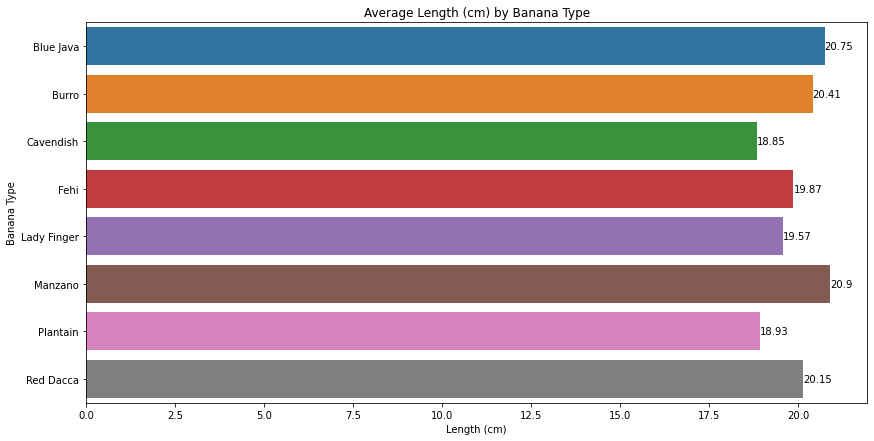

In [120]:
# What is the average length of a banana for each type?
variety_length = df.groupby(['variety'])['length_cm'].mean().reset_index()

# Round length_cm column to 2 decmials
variety_length['length_cm'] = variety_length['length_cm'].round(2)

plt.figure(figsize=(14,7))
ax = sns.barplot(data=variety_length, x='length_cm', y='variety')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Length (cm) by Banana Type')
plt.xlabel('Length (cm)')
plt.ylabel('Banana Type')
plt.show()

Manzano bananas have the highest average length at 20.90cm while Cavendish has the lowest average length at 18.85cm

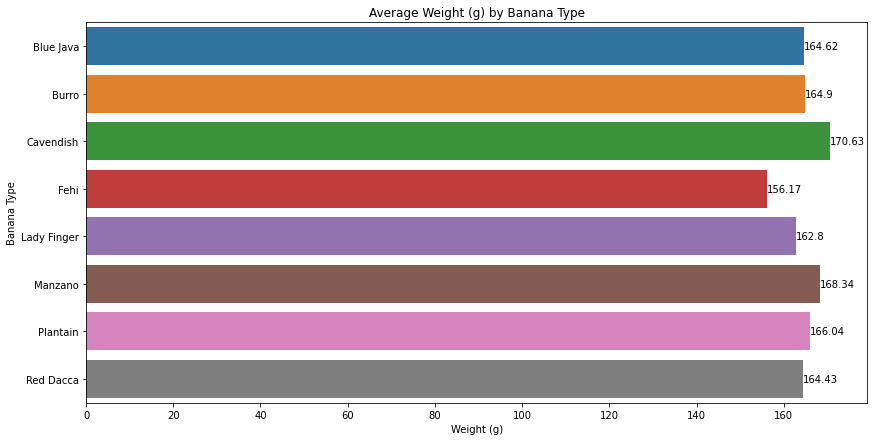

In [123]:
# What is the average weight of each banana type
variety_weight = df.groupby(['variety'])['weight_g'].mean().reset_index()

# Round weight_g column to 2 decmials
variety_weight['weight_g'] = variety_weight['weight_g'].round(2)

plt.figure(figsize=(14,7))
ax = sns.barplot(data=variety_weight, x='weight_g', y='variety')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Weight (g) by Banana Type')
plt.xlabel('Weight (g)')
plt.ylabel('Banana Type')
plt.show()

Cavendish bananas have the highest average weight in grams at 170.63g while Fehi bananas have the least at 156.17g.

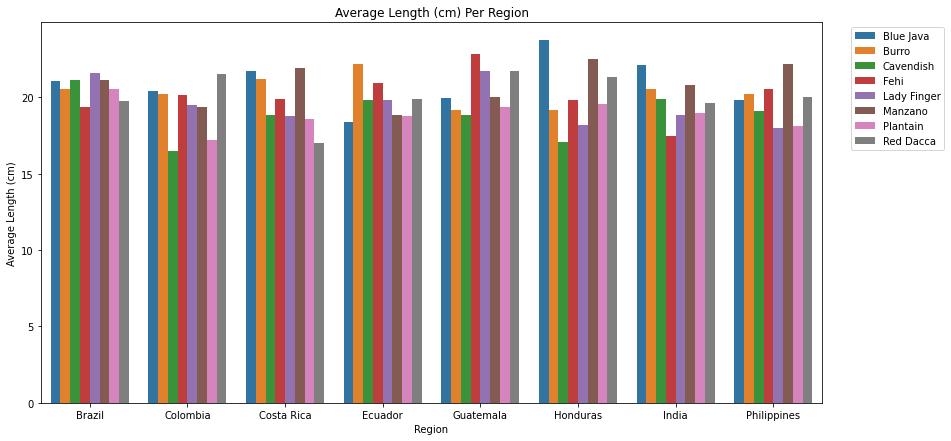

In [122]:
import plotly.express as px
# What is the average length and weight of each banana per region?

# Find the average length and weight for each region
avg_len_weight = df.groupby(['region', 'variety'])[['length_cm', 'weight_g']].mean().round(2).reset_index()

# Plot on a group bar chart
plt.figure(figsize=(14,7))
sns.barplot(data=avg_len_weight, x='region', y='length_cm', hue='variety')
plt.title('Average Length (cm) Per Region')
plt.xlabel('Region')
plt.ylabel('Average Length (cm)')
plt.legend(bbox_to_anchor=(1.03, 1.0), loc='upper left')
plt.show()

In [92]:
fig = px.bar(avg_len_weight, x='region', y='length_cm', color='variety', barmode='group', 
             title="Average Length (cm) per Region")
fig.show()

In [126]:
df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm,year
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6,2023
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8,2023
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7,2023
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8,2023
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7,2023


In [130]:
# Identify the quality category based on the quality score ranges
df.groupby(['quality_category'])['quality_score'].agg(['min', 'max'])

,min,max
quality_category,,
Good,2.51,3.50
Premium,3.51,3.89
Processing,1.51,2.50
Unripe,0.92,1.50


Quality category based on quality score range:

Unripe: less than and including 1.50

Processing: between 1.51 - 2.50

Good: between 2.51 - 3.50

Premium: greater than 3.50

In [131]:
# Identify the ripeness category based on the ripeness index
df.groupby(['ripeness_category'])['ripeness_index'].agg(['min', 'max'])

,min,max
ripeness_category,,
Green,1.02,2.00
Overripe,6.02,7.00
Ripe,4.02,5.99
Turning,2.01,3.99


Ripeness category based on ripeness index:

Green: less than and including 2.00

Turning: between 2.01 - 4.00

Ripe: between 4.01 - 6.00

Overripe greater than 6.00

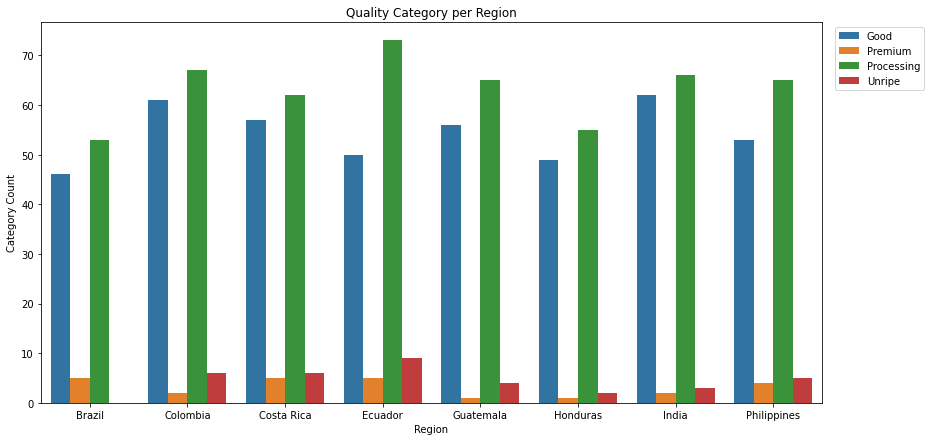

In [149]:
# Show the quality category for each region
region_qual_cat = df.groupby(['region', 'quality_category']).size().reset_index(name='count')
region_qual_cat

# Plot on bar graph
plt.figure(figsize=(14,7))
sns.barplot(data=region_qual_cat, x='region', y='count', hue='quality_category')
plt.title("Quality Category per Region")
plt.xlabel('Region')
plt.ylabel('Category Count')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
plt.show()

The majority of banana's in all regions are in the processing state followed by the good state.

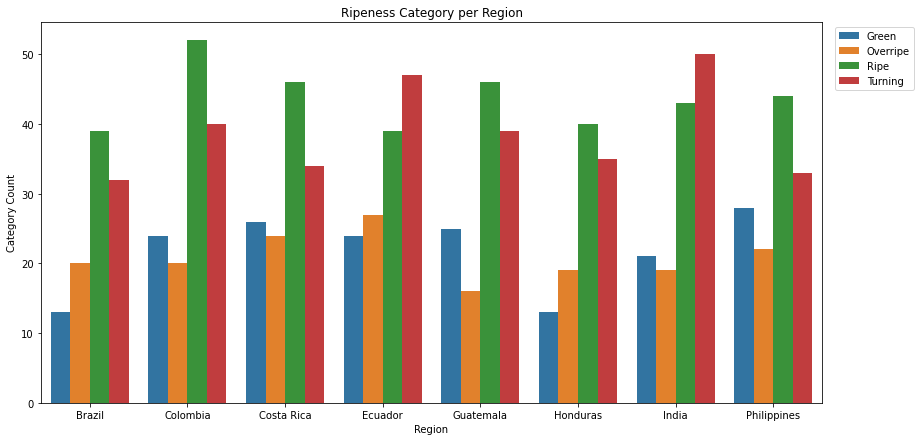

In [150]:
# Show the ripeness category for each region
region_ripe_cat = df.groupby(['region', 'ripeness_category']).size().reset_index(name='count')

# Plot on bar graph
plt.figure(figsize=(14,7))
sns.barplot(data=region_ripe_cat, x='region', y='count', hue='ripeness_category')
plt.title("Ripeness Category per Region")
plt.xlabel('Region')
plt.ylabel('Category Count')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left')
plt.show()